<a href="https://colab.research.google.com/github/kristianbagus/project/blob/main/Eksplorasi_dan_Analisis_Data_COVID_19_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latar Belakang Project

COVID-19 merupakan penyakit yang saat ini telah menjadi pandemi secara global. Kondisi menjadi semakin mengkhawatirkan karena hingga detik ini masih belum ditemukan vaksin yang efektif untuk virus penyebab COVID-19. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.

Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal PIKOBAR milik pemerintah Provinsi Jawa Barat. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.

Dalam proyek ini, akan dicoba untuk menganalisa data yang sudah disediakan pemerintah serta memvisualisasikannya melalui grafik. Data yang digunakan diambil langsung dari API (Application Programming Interface) yang tersedia di covid19.go.id. Rekapitulasi data COVID-19 Indonesia tersedia dalam API publik yang beralamat di https://data.covid19.go.id/public/api/update.json.


## Import data dengan API

In [1]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json', verify=False)
print(resp)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Response [200]>


### Check Headers


In [2]:
# Cek headers
resp.headers

{'Server': 'nginx', 'Date': 'Sun, 30 Jan 2022 09:37:49 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Sun, 30 Jan 2022 09:32:50 GMT', 'ETag': 'W/"61f65b42-42174"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}

### Mengekstrak Isi Respon

Respon API dengan status code 200 menyatakan bahwa permintaan berhasil dipenuhi dan konten yang diminta tersedia untuk diekstrak. Selain itu, diketahui juga lewat attribut headers bahwa konten yang diminta tersedia dalam bentuk application/json, yaitu berkas JSON.


In [3]:
# Extract data
cov_id_raw = resp.json()

# Cek isi data
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


Setelah mengetahui komponen cov_id_raw, kita bisa mengkestrak data yang dibutuhkan.

In [4]:
cov_id_update = cov_id_raw['update']


## Analisa Data

Setelah berhasil mengekstrak data, kita bisa menjawab pertanyaan-pertanyaan berikut untuk menganalisa perkembangan covid-19:

1. Kapan tanggal pembaharuan data penambahan kasus?
2. Berapa jumlah penambahan kasus sembuh?
3. Berapa jumlah penambahan kasus meninggal?
4. Berapa jumlah total kasus positif hingga saat ini?
5. Berapa jumlah total kasus meninggal hingga saat ini?



In [5]:
print('Tanggal pembaharuan data penambahan kasus    :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh               :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal            :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini   :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus    : 2022-01-29
Jumlah penambahan kasus sembuh               : 2590
Jumlah penambahan kasus meninggal            : 17
Jumlah total kasus positif hingga saat ini   : 4330763
Jumlah total kasus meninggal hingga saat ini : 144285


## Covid-19 di Jawa Barat

Setelah berhasil menjawab pertanyaan mengenai kondisi COVID-19 di Indonesia, kita dapat lebih spesifik berfokus dengan data COVID-19 di tingkat provinsi. Kali ini, contoh yang akan digunakan adalah provinsi Jawa Barat.

In [6]:
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## Memahami Kasus COVID-19 di Jawa Barat

Sama seperti kasus COVID-19 di seluruh Indonesia, kita bisa memahami COVID-19 di Jawa Barat dengan menjawab pertanyaan-pertanyaan seperti:

1. Berapa jumlah total kasus COVID-19 di Jawa Barat?
2. Berapa persentase kematian akibat COVID-19 di Jawa Barat?
3. Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?



In [7]:
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


In [8]:
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])


Jumlah total kasus COVID-19 di Jawa Barat                 : 722164
Persentase kematian akibat COVID-19 di Jawa Barat         : 2.045934.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 96.271623.2%


## Memperoleh Informasi yang Lebih Lengkap

Setelah informasi umum mengenai COVID-19 di Jawa Barat telah diketahui, kita bisa mendapatkan informasi yang lebih lengkap dari waktu ke waktu. Data dari covid19.go.id menyediakannya melalui API dengan nama list_perkembangan.

In [9]:
import pandas as pd

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       698 non-null    int64
 1   KASUS                         698 non-null    int64
 2   MENINGGAL                     698 non-null    int64
 3   SEMBUH                        698 non-null    int64
 4   DIRAWAT_OR_ISOLASI            698 non-null    int64
 5   AKUMULASI_KASUS               698 non-null    int64
 6   AKUMULASI_SEMBUH              698 non-null    int64
 7   AKUMULASI_MENINGGAL           698 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  698 non-null    int64
dtypes: int64(9)
memory usage: 49.2 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1583193600000      1  ...                    1                             0
1  1583280000000 

## Mengolah Data
Setelah mengekstrak dan mengamati cov_jabar, ditemukan beberapa kejanggalan pada data tersebut. Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. Untuk itulah akan dilakukan beberapa tahapan untuk mengolah data tersebut sehingga dapat diolah dan dianalisis dengan lebih mudah. Beberapa tahapan yang akan dilakukan, yaitu:

1. Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
2. Merubah format penulisan semua kolom menjadi huruf kecil
3. Mengganti nama kolom kasus menjadi kasus_baru
4. Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime



In [10]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )

cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0



## Visualisasi Gambar

Setelah berhasil mengolah data cov_jabar menjadi cov_jabar_tidy, kita bisa memvisualisasikan data tersebut sehingga lebih mudah untuk dibaca oleh orang lain.

1. Grafik untuk Kasus Harian
2. Grafik untuk Kasus Sembuh
3. Grafik untuk Kasus Meninggal


### Grafik untuk Kasus Harian

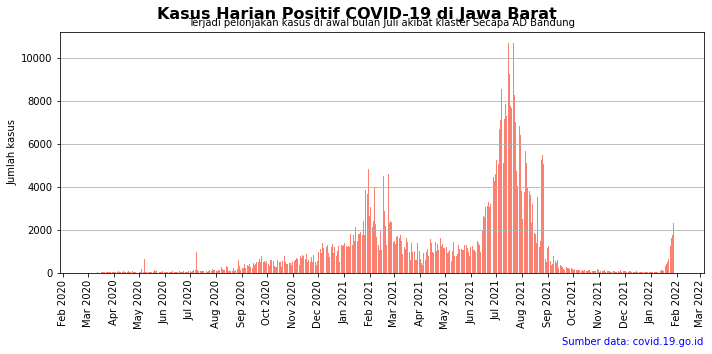

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Grafik untuk Kasus Sembuh

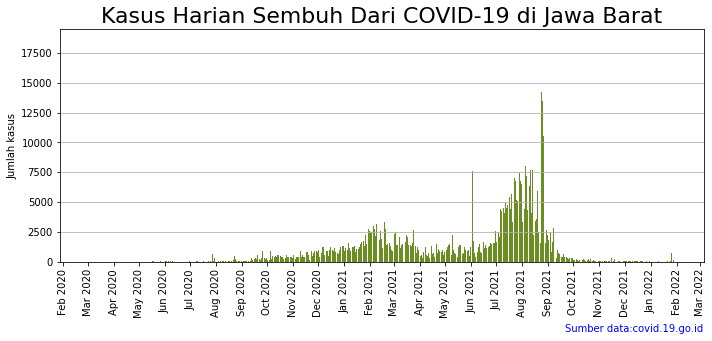

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data:covid.19.go.id' , color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Grafik untuk Kasus Meninggal

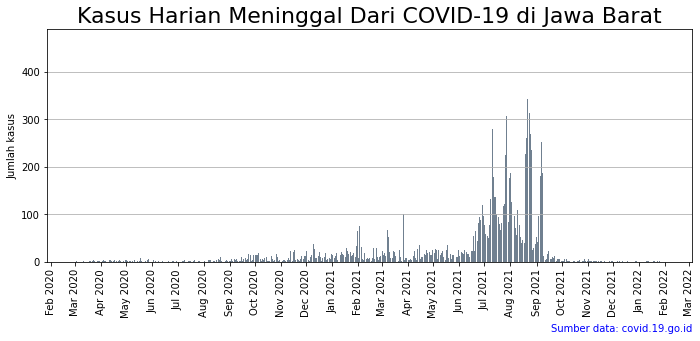

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Apakah Pekan ini Lebih Baik?

Setelah mengamati grafik perkembangan kasus, dapat dilihat bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut, selanjutnya akan dicoba untuk mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan.

In [15]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] =cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     100 non-null    int64
 1   pekan_ke  100 non-null    int64
 2   jumlah    100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89



## Menjawab Pertanyaan

Terdapat pertanyaan baru yang muncul setelah melakukan inspeksi terhadap data cov_jabar_pekanan: "Apakah pekan ini lebih baik dari pekan kemarin?"


In [17]:
import numpy as np

cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


## Membuat Bar Chart

Dengan menggunakan data hasil perhitungan tersebut maka kita bisa membuat bar-chat penambahan kasus pekanan yang ditambahkan informasi baru untuk menjawab pertanyaan: "Apakah pekan ini lebih baik?"

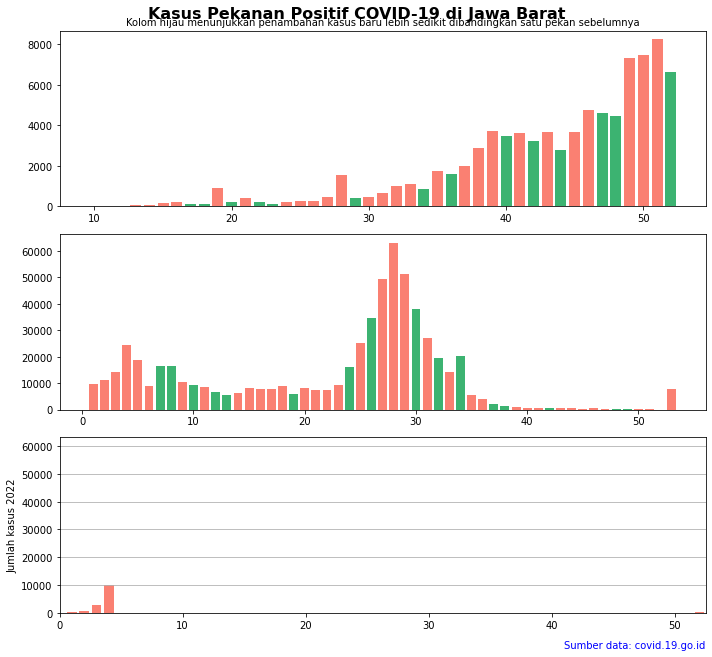

In [18]:
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
						 figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat', 
			 y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
	ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]],
		  x='pekan_ke', height='jumlah',
		  color=['mediumseagreen' if x is True else 'salmon' 
				 for x in cov_jabar_pekanan['lebih_baik']])
	if i == 0:
		ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
					fontsize=10)
	elif i == jml_tahun_terjadi_covid19-1:
		ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
			   ha='right', transform=ax.transAxes)
		
		ax.set_xlim([0,52.5])
		ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
		ax.set_xlabel('')
		ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
		ax.grid(axis='y')
		
plt.tight_layout()
plt.show()


## Pola dan Dinamika

Ada yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat COVID-19. Sementara itu penambahan kasus baru terus terjadi di masyarakat. Hal ini memicu pertanyaan lain: "Hingga saat ini ada berapa kasus yang masih aktif?"

In [19]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
693 2022-01-25             4935            694280                14771
694 2022-01-26             5844            694988                14773
695 2022-01-27             7552            695013                14774
696 2022-01-28             9718            695147                14774
697 2022-01-29            12187            695203                14774


## Membuat Line Chart

Sekarang kita bisa membuat line-chart pola kasus aktif dari data yang telah dibuat.

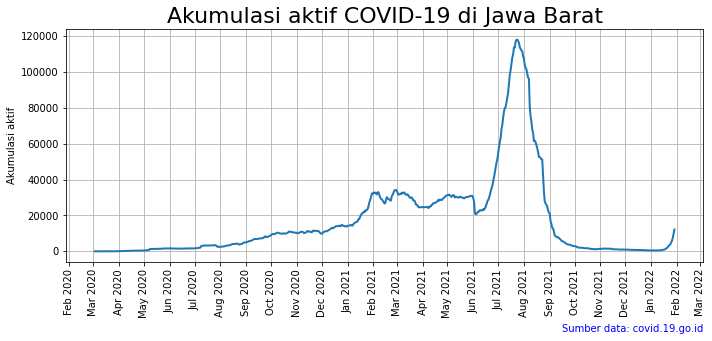

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal','akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()


## Kabar Buruk dan Kabar Baik

Sebagai penutup analisis dalam proyek ini, kita bisa membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh, dan kasus meninggal.

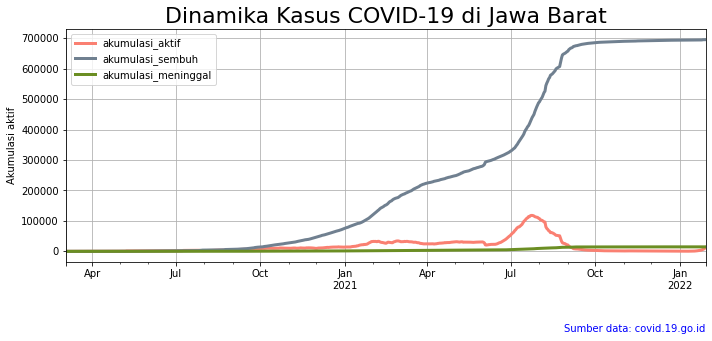

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
						   color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
			fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
	   ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()

## Kesimpulan & Penutup

Dengan demikian proyek analisis COVID-19 ini telah selesai. Pada proyek ini kita telah berhasil mempraktikan untuk melakukan impor data melalui API, melakukan transformasi data, serta membuat visualisasi untuk mengkomunikasikan hasil analisis data tentang COVID-19. Selanjutnya, kita bisa mengembangkan analisis dengan cara mengambil studi kasus provinsi lain atau bahkan melakukan komparasi antar provinsi.